In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
agri_test = pd.read_excel (r'C:\Users\dell\Downloads\test_agriculture.xlsx')
agri_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [3]:
agri_test.drop(['ID'],axis=1,inplace=True)

In [4]:
agri_test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [5]:
agri_test['Number_Weeks_Used'] = agri_test['Number_Weeks_Used'].fillna(0)

In [6]:
agri_test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [7]:
agri_train = pd.read_excel (r'C:\Users\dell\Downloads\train_agriculture.xlsx')
agri_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [8]:
agri_train.drop(['ID'],axis=1,inplace=True)

In [9]:
agri_train.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [10]:
agri_train['Number_Weeks_Used'] = agri_train['Number_Weeks_Used'].fillna(0)

In [11]:
agri_train.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [12]:
agri_train.dtypes, agri_test.dtypes

(Estimated_Insects_Count      int64
 Crop_Type                    int64
 Soil_Type                    int64
 Pesticide_Use_Category       int64
 Number_Doses_Week            int64
 Number_Weeks_Used          float64
 Number_Weeks_Quit            int64
 Season                       int64
 Crop_Damage                  int64
 dtype: object,
 Estimated_Insects_Count      int64
 Crop_Type                    int64
 Soil_Type                    int64
 Pesticide_Use_Category       int64
 Number_Doses_Week            int64
 Number_Weeks_Used          float64
 Number_Weeks_Quit            int64
 Season                       int64
 dtype: object)

In [13]:
agri_train.shape, agri_test.shape

((4599, 9), (1199, 8))

In [14]:
agri_train.columns, agri_test.columns

(Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
        'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
        'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
       dtype='object'),
 Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
        'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
        'Number_Weeks_Quit', 'Season'],
       dtype='object'))

In [15]:
agri_train.info, agri_test.info

(<bound method DataFrame.info of       Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
 0                         188          1          0                       1   
 1                         209          1          0                       1   
 2                         257          1          0                       1   
 3                         257          1          1                       1   
 4                         342          1          0                       1   
 ...                       ...        ...        ...                     ...   
 4594                     2138          0          1                       2   
 4595                     2139          0          1                       2   
 4596                     2267          0          1                       2   
 4597                     2267          0          1                       2   
 4598                     2267          0          1                       2   
 
      

In [16]:
agri_train.keys, agri_test.keys

(<bound method NDFrame.keys of       Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
 0                         188          1          0                       1   
 1                         209          1          0                       1   
 2                         257          1          0                       1   
 3                         257          1          1                       1   
 4                         342          1          0                       1   
 ...                       ...        ...        ...                     ...   
 4594                     2138          0          1                       2   
 4595                     2139          0          1                       2   
 4596                     2267          0          1                       2   
 4597                     2267          0          1                       2   
 4598                     2267          0          1                       2   
 
       N

In [17]:
agri_train.describe(), agri_test.describe()

(       Estimated_Insects_Count    Crop_Type    Soil_Type  \
 count              4599.000000  4599.000000  4599.000000   
 mean               1363.000435     0.224831     0.476625   
 std                 814.439120     0.417517     0.499508   
 min                 150.000000     0.000000     0.000000   
 25%                 731.000000     0.000000     0.000000   
 50%                1212.000000     0.000000     0.000000   
 75%                1786.000000     0.000000     1.000000   
 max                4097.000000     1.000000     1.000000   
 
        Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
 count             4599.000000        4599.000000        4599.000000   
 mean                 2.283540          26.477495          26.114373   
 std                  0.471978          15.524647          14.686945   
 min                  1.000000           0.000000           0.000000   
 25%                  2.000000          15.000000          17.000000   
 50%             

In [18]:
agri_train['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

(<matplotlib.axes._subplots.AxesSubplot at 0x178f49e08c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x178f49e08c8>)

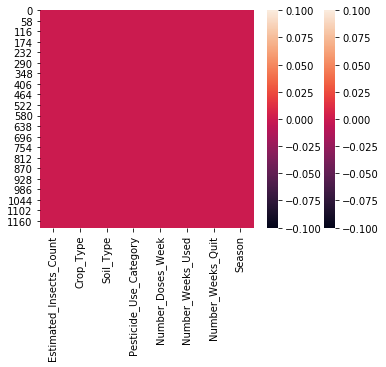

In [19]:
sns.heatmap(agri_train.isnull()), sns.heatmap(agri_test.isnull())

In [20]:
train=agri_train.corr()
train,

(                         Estimated_Insects_Count  Crop_Type  Soil_Type  \
 Estimated_Insects_Count                 1.000000  -0.036911  -0.151796   
 Crop_Type                              -0.036911   1.000000  -0.175019   
 Soil_Type                              -0.151796  -0.175019   1.000000   
 Pesticide_Use_Category                 -0.027111   0.349662   0.021661   
 Number_Doses_Week                      -0.122509  -0.163832   0.050099   
 Number_Weeks_Used                       0.360166   0.000700  -0.080775   
 Number_Weeks_Quit                       0.246719  -0.273475  -0.034355   
 Season                                 -0.009482  -0.000549   0.011052   
 Crop_Damage                             0.202312   0.021772  -0.059481   
 
                          Pesticide_Use_Category  Number_Doses_Week  \
 Estimated_Insects_Count               -0.027111          -0.122509   
 Crop_Type                              0.349662          -0.163832   
 Soil_Type                         

In [21]:
test=agri_test.corr()
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.370498,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.047157,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.077139,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.332172,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.083427,0.009077,0.027197
Number_Weeks_Used,0.370498,0.047157,-0.077139,0.332172,0.083427,1.000000,-0.285975,0.005186
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.285975,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.005186,0.030281,1.000000


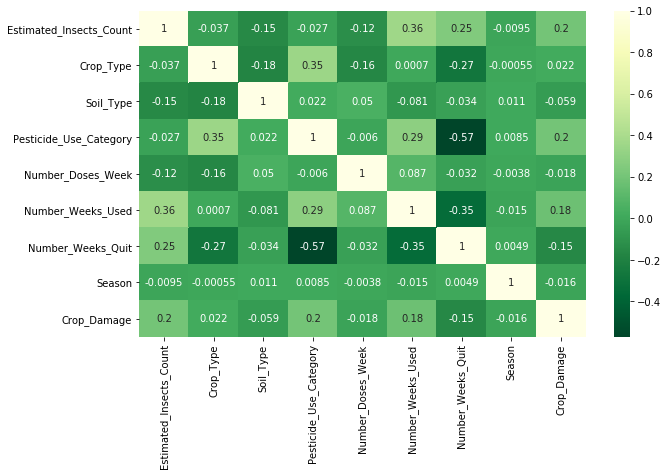

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(train,cmap='YlGn_r',annot=True)

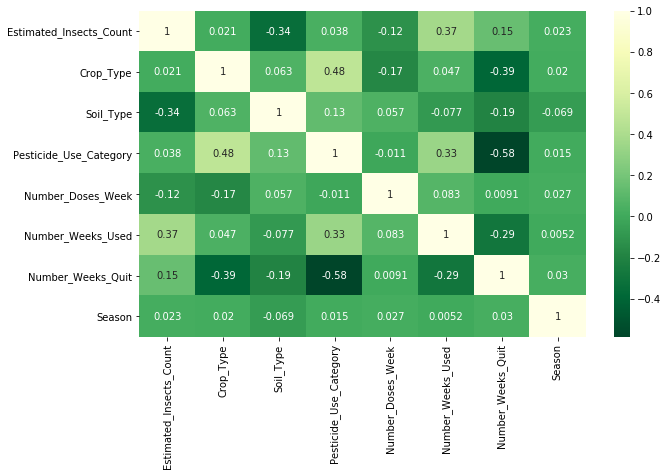

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(test,cmap='YlGn_r',annot=True)

In [24]:
agri_train['source']='train'
agri_test['source']='test'
agri_test['Item_Outlet_Sales']=0
df=pd.concat([agri_train,agri_test])
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source,Item_Outlet_Sales
0,188,1,0,1,0,0.0,0,1,0.0,train,NaN
1,209,1,0,1,0,0.0,0,2,1.0,train,NaN
2,257,1,0,1,0,0.0,0,2,1.0,train,NaN
3,257,1,1,1,0,0.0,0,2,1.0,train,NaN
4,342,1,0,1,0,0.0,0,2,1.0,train,NaN


In [25]:
agri_test.drop('source',inplace=True,axis=1)
agri_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Item_Outlet_Sales
0,188,1,1,1,0,0.0,0,2,0
1,410,1,1,1,0,0.0,0,2,0
2,626,1,0,1,0,0.0,0,2,0
3,731,1,0,1,0,0.0,0,2,0
4,789,0,0,1,0,0.0,0,1,0


In [26]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'source',
       'Item_Outlet_Sales'],
      dtype='object')

In [27]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
        'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Quit',
        'Season'],
       dtype='object'),
 dtype('float64'): Index(['Number_Weeks_Used', 'Crop_Damage', 'Item_Outlet_Sales'], dtype='object'),
 dtype('O'): Index(['source'], dtype='object')}

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  5798 non-null   int64  
 1   Crop_Type                5798 non-null   int64  
 2   Soil_Type                5798 non-null   int64  
 3   Pesticide_Use_Category   5798 non-null   int64  
 4   Number_Doses_Week        5798 non-null   int64  
 5   Number_Weeks_Used        5798 non-null   float64
 6   Number_Weeks_Quit        5798 non-null   int64  
 7   Season                   5798 non-null   int64  
 8   Crop_Damage              4599 non-null   float64
 9   source                   5798 non-null   object 
 10  Item_Outlet_Sales        1199 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 543.6+ KB


In [29]:
df.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used             0
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
source                        0
Item_Outlet_Sales          4599
dtype: int64

In [30]:
for col in ['Crop_Damage','Item_Outlet_Sales']:
    df[col].fillna(df[col].mode()[0], inplace=True)

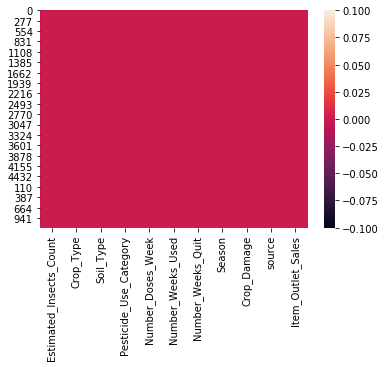

In [31]:
sns.heatmap(df.isnull())

In [32]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Item_Outlet_Sales
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.0
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,26.122111,8.760262,1.891687,0.154191,0.0
std,821.330403,0.413280,0.499271,0.484594,15.655508,14.733921,9.582781,0.692997,0.412449,0.0
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,731.000000,0.000000,0.000000,2.000000,15.000000,17.000000,0.000000,1.000000,0.000000,0.0
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,26.000000,6.000000,2.000000,0.000000,0.0
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000,0.0
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000,0.0


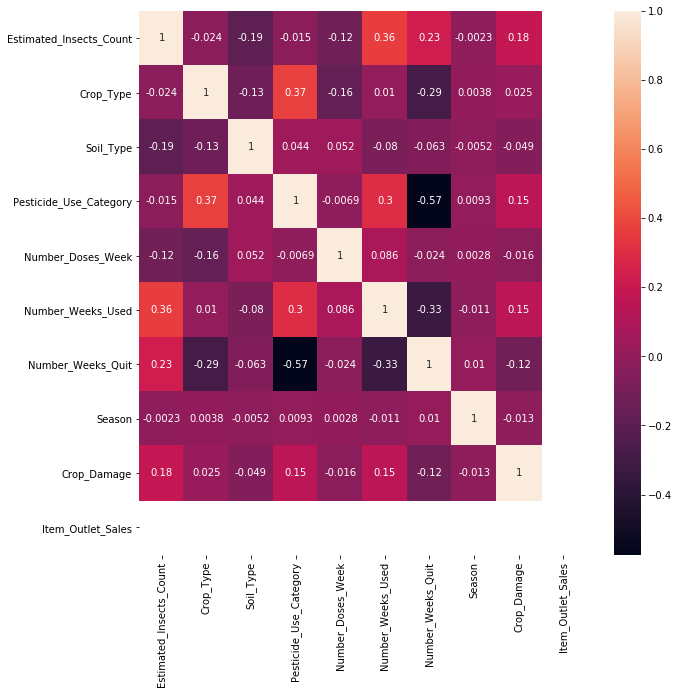

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [34]:
df_int=df.select_dtypes(include=[np.number])
df_int.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Item_Outlet_Sales
0,188,1,0,1,0,0.0,0,1,0.0,0.0
1,209,1,0,1,0,0.0,0,2,1.0,0.0
2,257,1,0,1,0,0.0,0,2,1.0,0.0
3,257,1,1,1,0,0.0,0,2,1.0,0.0
4,342,1,0,1,0,0.0,0,2,1.0,0.0


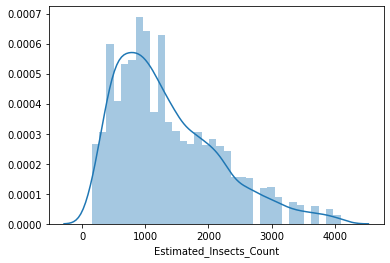

In [35]:
sns.distplot(df_int['Estimated_Insects_Count'])

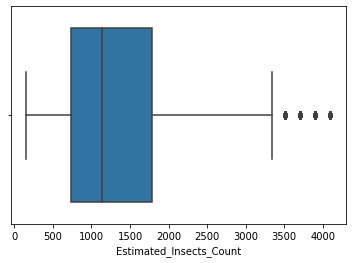

In [36]:
sns.boxplot(df_int['Estimated_Insects_Count'])

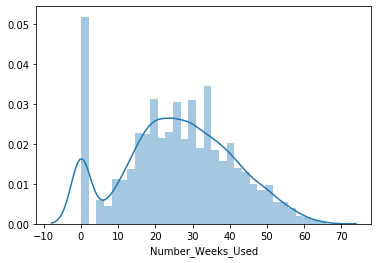

In [37]:
sns.distplot(df_int['Number_Weeks_Used'])

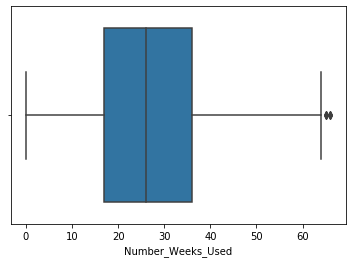

In [38]:
sns.boxplot(df_int['Number_Weeks_Used'])

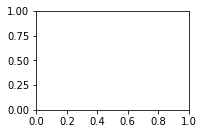

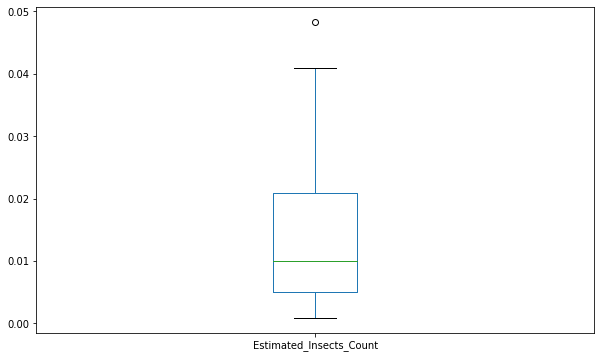

In [39]:
plt.subplot(222)
#plt.subplot(223)
agri_test['Estimated_Insects_Count'].value_counts(normalize=True).plot.box(plt.figure(figsize=(10,6)))

<function matplotlib.pyplot.show(*args, **kw)>

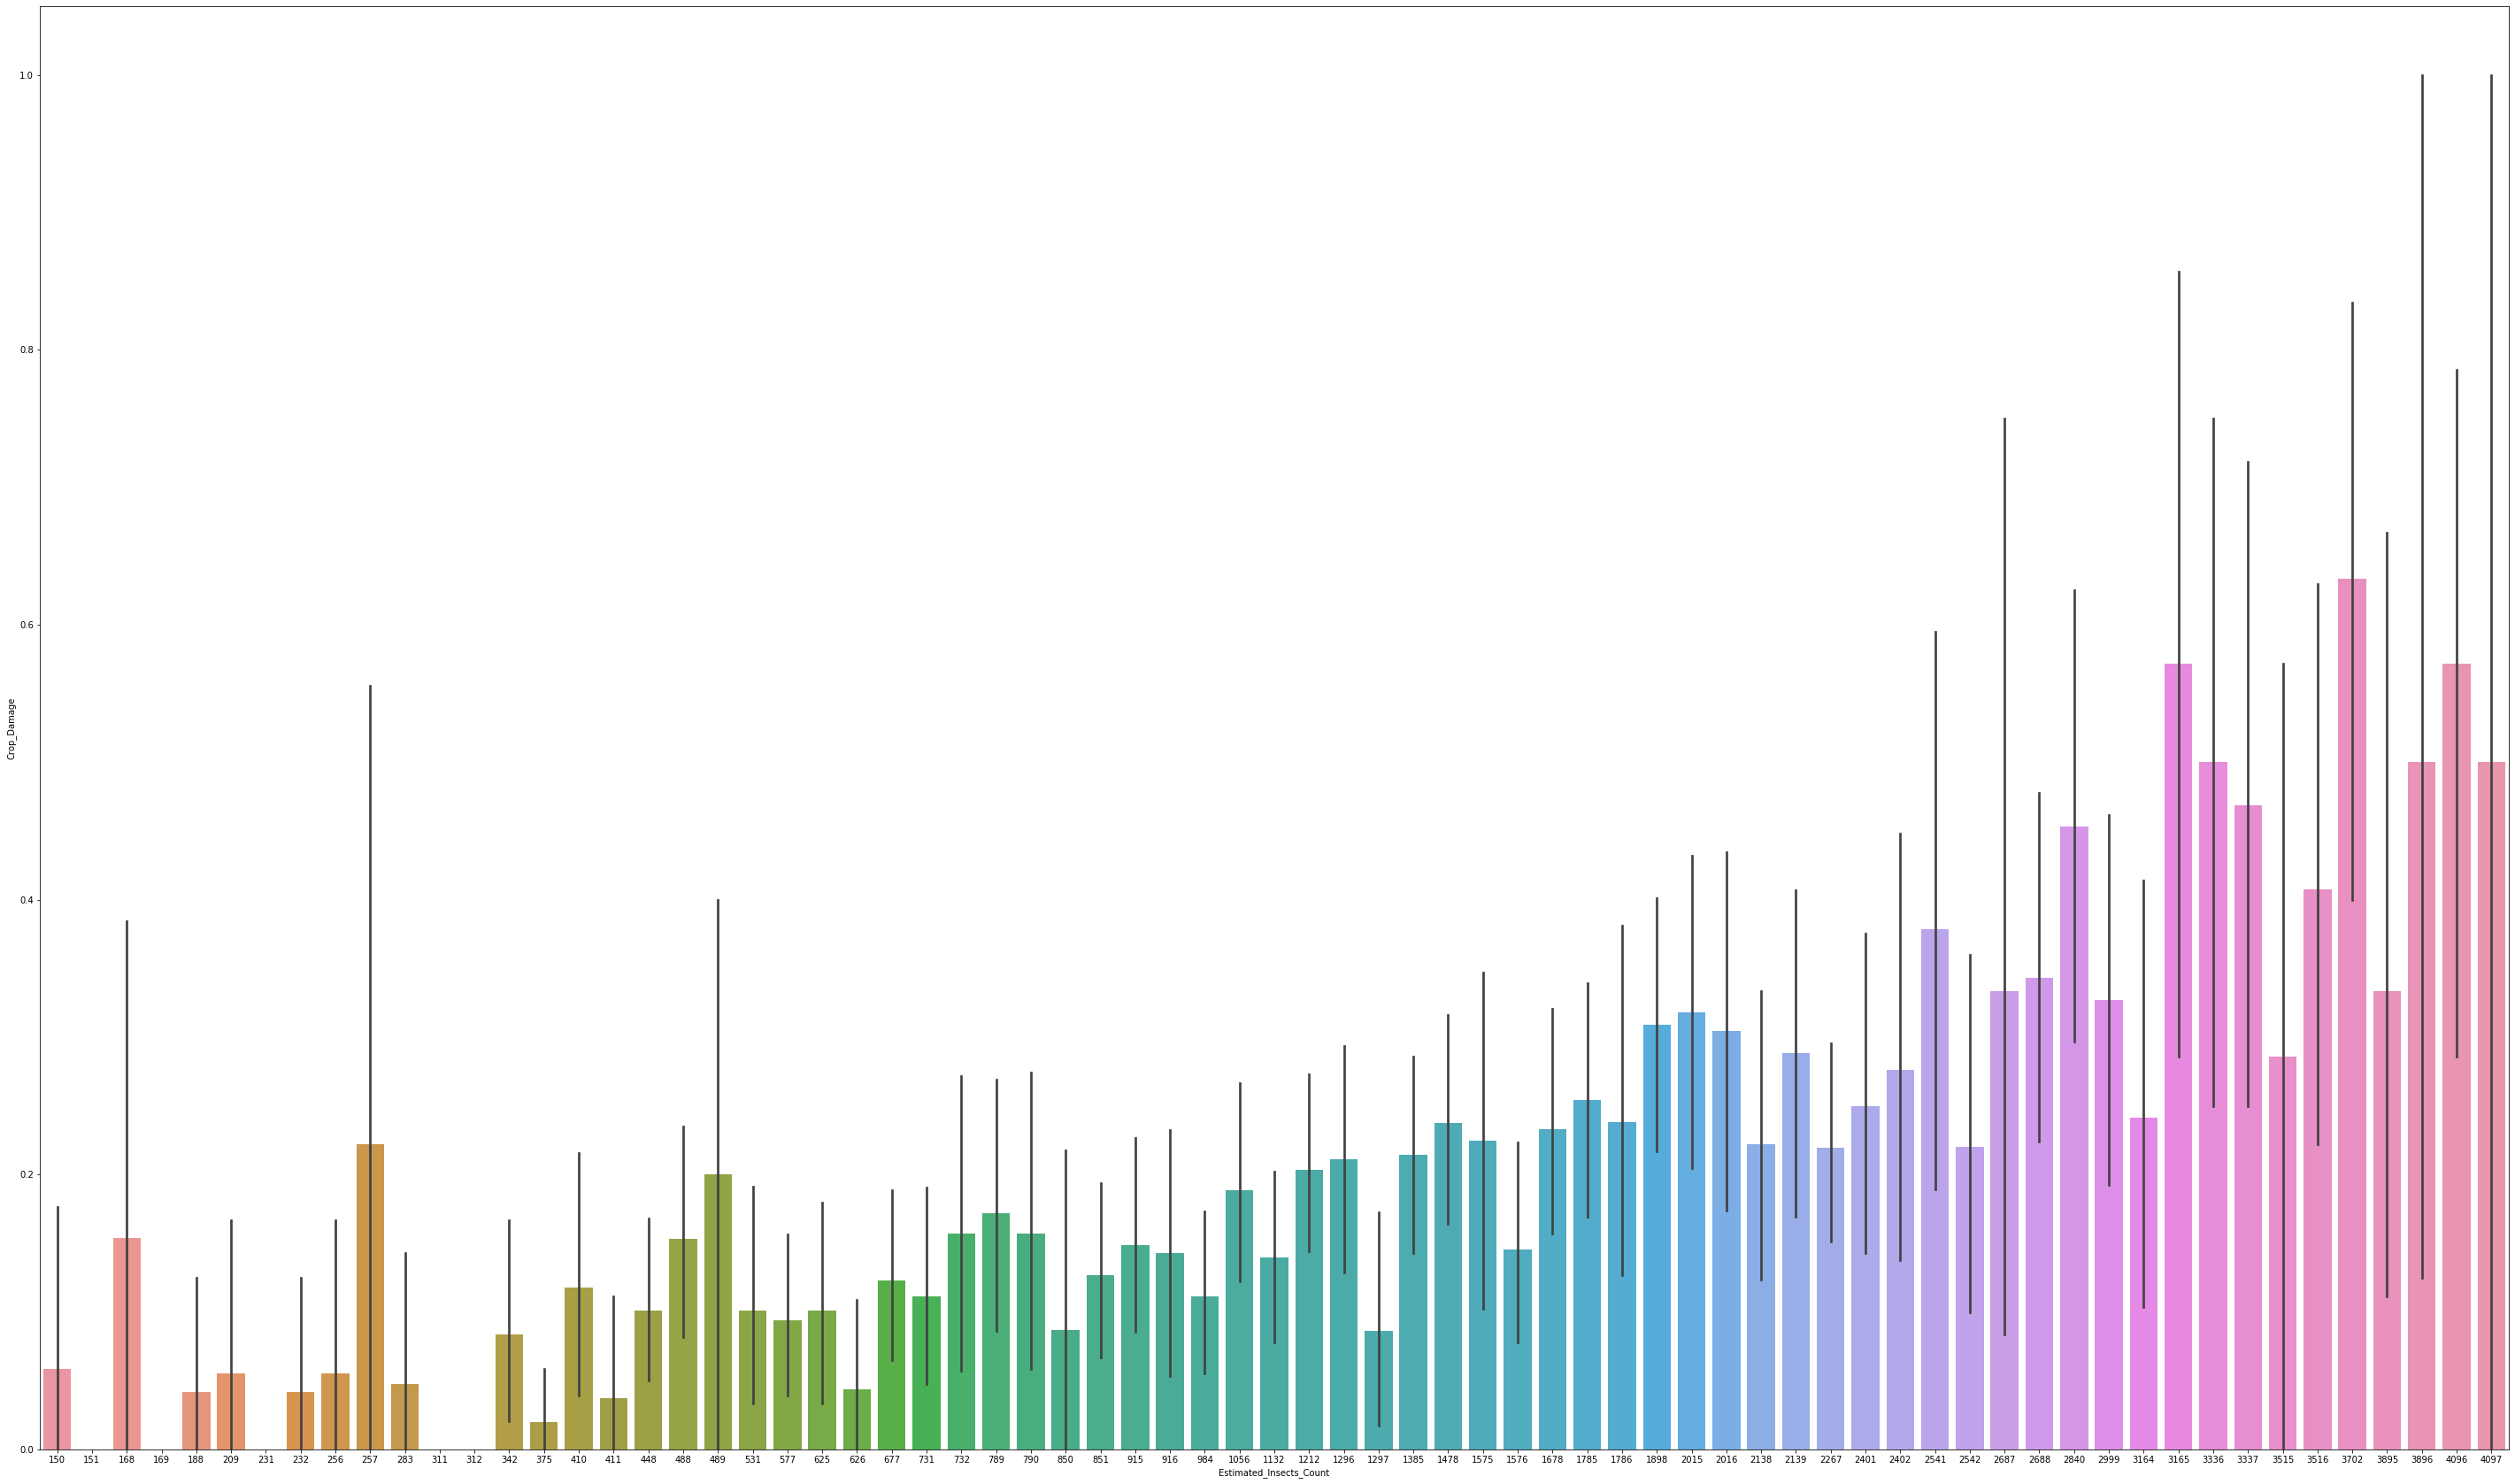

In [40]:
# check the aveage class of wine according to alcohol in barplot
plt.figure(figsize=(50,30))
sns.barplot(x=agri_train['Estimated_Insects_Count'],y=agri_train['Crop_Damage'],data=agri_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

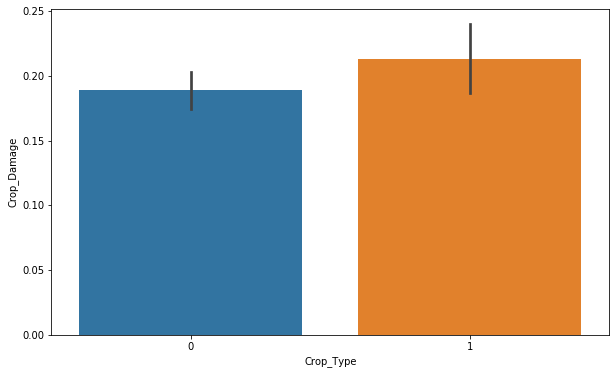

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x=agri_train['Crop_Type'],y=agri_train['Crop_Damage'],data=agri_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

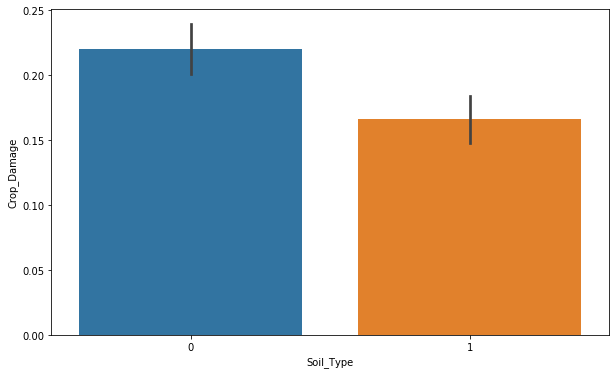

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=agri_train['Soil_Type'],y=agri_train['Crop_Damage'],data=agri_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

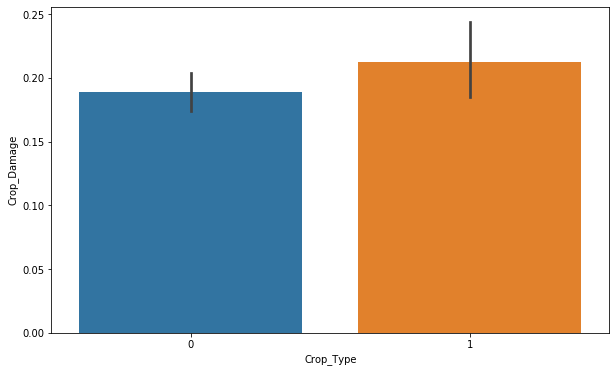

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x=agri_train['Crop_Type'],y=agri_train['Crop_Damage'],data=agri_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

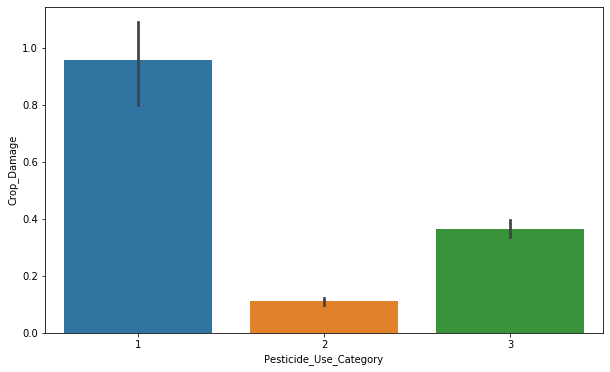

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=agri_train['Pesticide_Use_Category'],y=agri_train['Crop_Damage'],data=agri_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

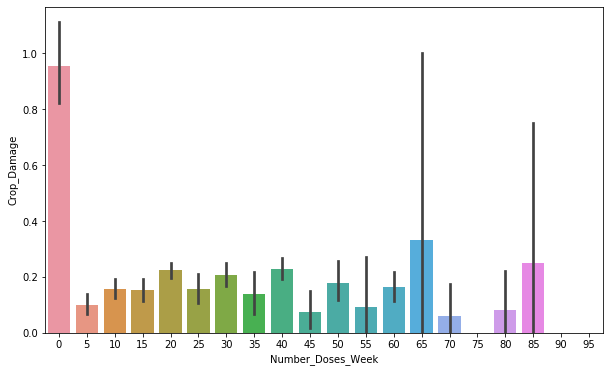

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=agri_train['Number_Doses_Week'],y=agri_train['Crop_Damage'],data=agri_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

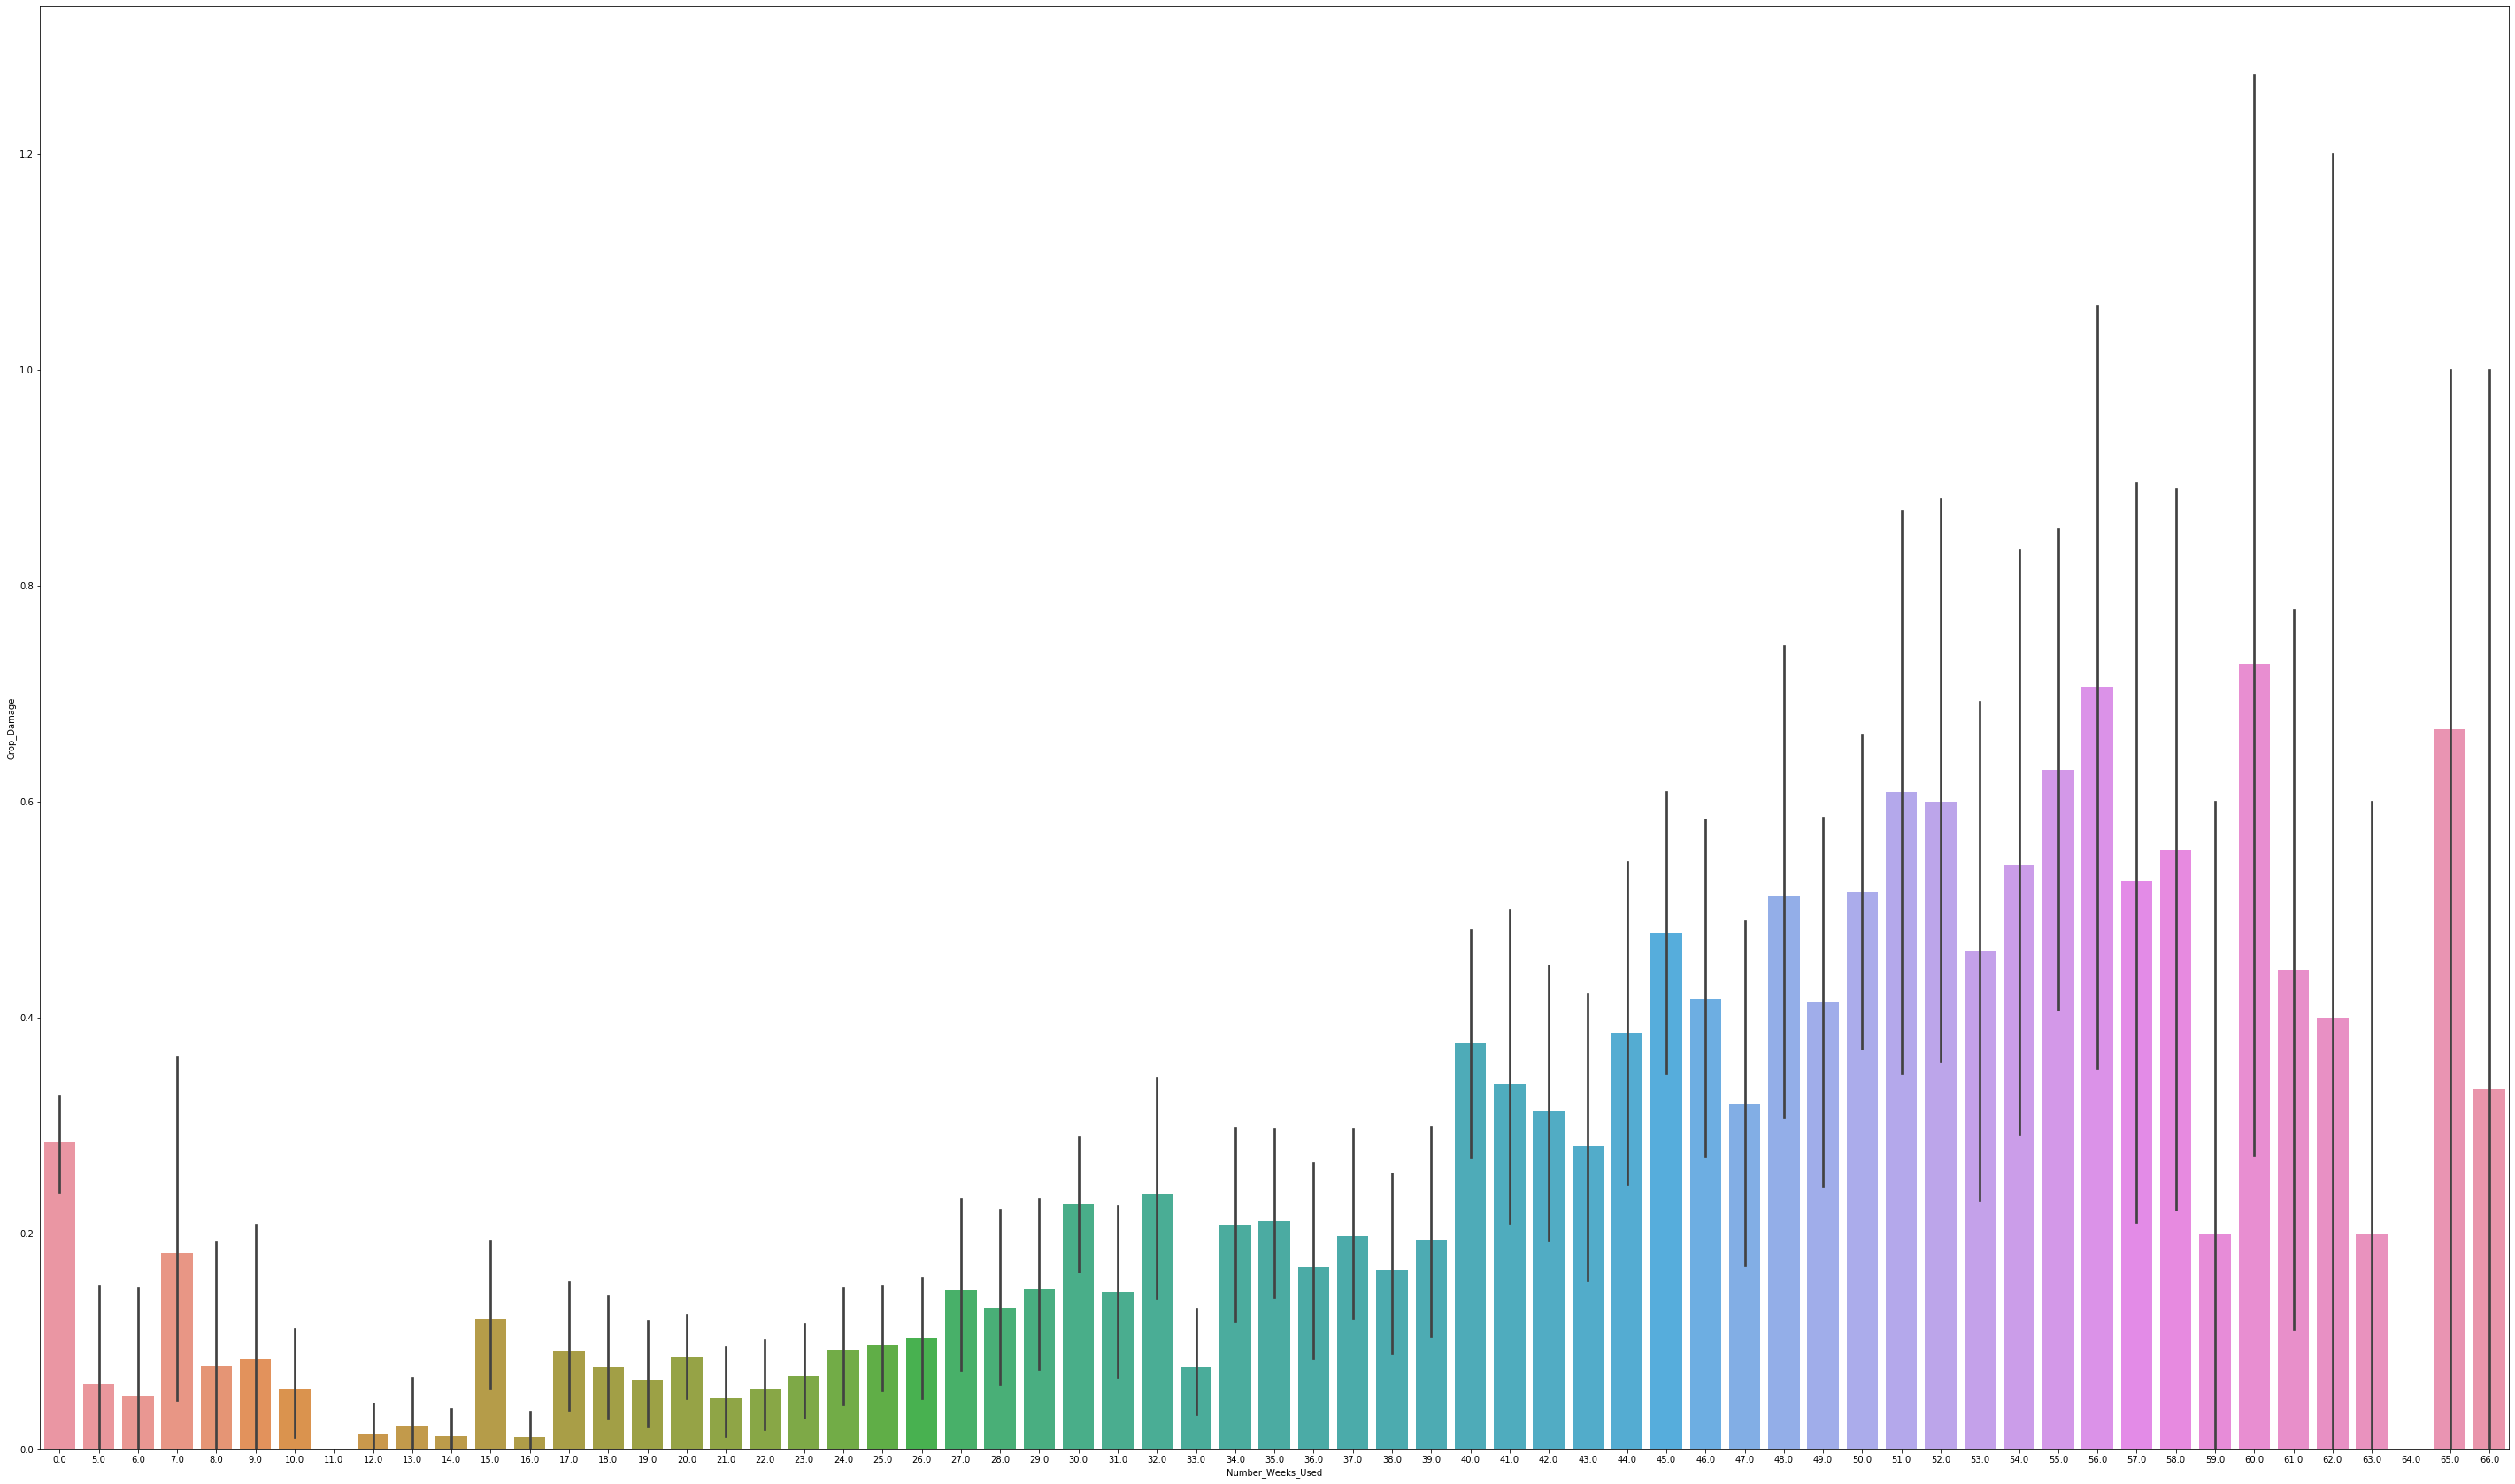

In [46]:
plt.figure(figsize=(50,30))
sns.barplot(x=agri_train['Number_Weeks_Used'],y=agri_train['Crop_Damage'],data=agri_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

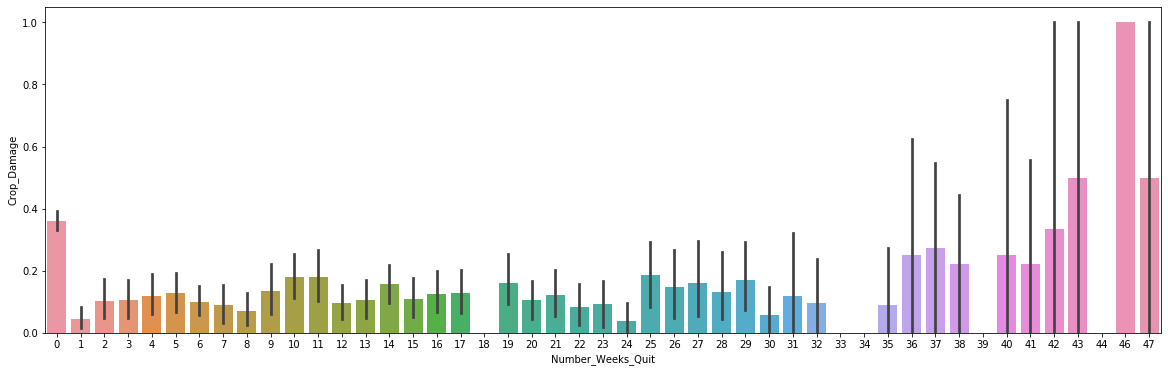

In [47]:
plt.figure(figsize=(20,6))
sns.barplot(x=agri_train['Number_Weeks_Quit'],y=agri_train['Crop_Damage'],data=agri_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

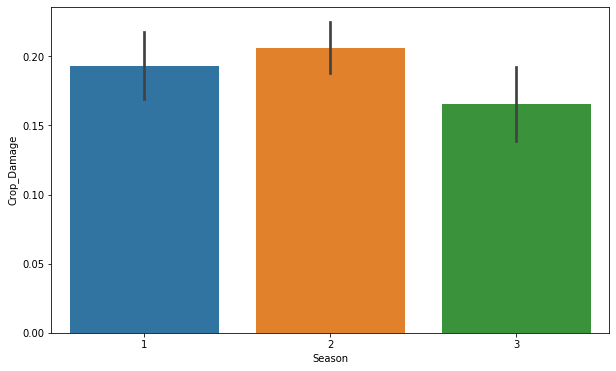

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x=agri_train['Season'],y=agri_train['Crop_Damage'],data=agri_train)
plt.show

In [49]:
agri_train_int=agri_train.select_dtypes(include=[np.number])
agri_train_int

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,0.0,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


In [50]:
agri_test_int=agri_test.select_dtypes(include=[np.number])
agri_test_int

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Item_Outlet_Sales
0,188,1,1,1,0,0.0,0,2,0
1,410,1,1,1,0,0.0,0,2,0
2,626,1,0,1,0,0.0,0,2,0
3,731,1,0,1,0,0.0,0,2,0
4,789,0,0,1,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3,0
1195,1132,0,1,2,40,25.0,3,1,0
1196,1132,0,1,2,20,13.0,23,1,0
1197,1212,0,1,2,10,35.0,5,1,0


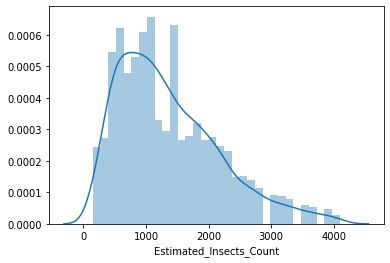

In [51]:
sns.distplot(agri_train_int['Estimated_Insects_Count'])

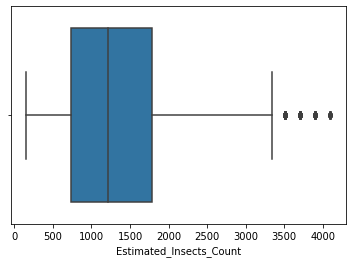

In [52]:
sns.boxplot(agri_train_int['Estimated_Insects_Count'])

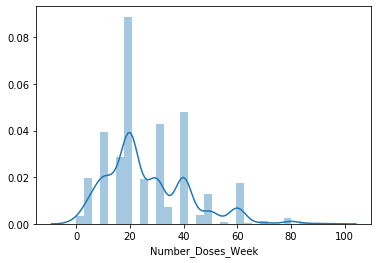

In [53]:
sns.distplot(agri_train_int['Number_Doses_Week'])

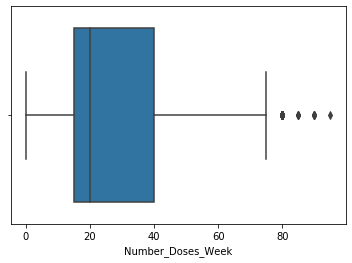

In [54]:
sns.boxplot(agri_train_int['Number_Doses_Week'])

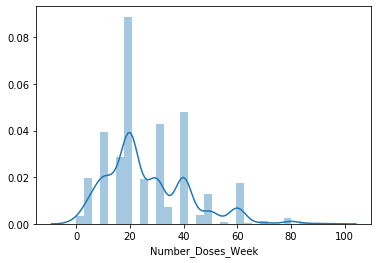

In [55]:
sns.distplot(agri_train_int['Number_Doses_Week'])

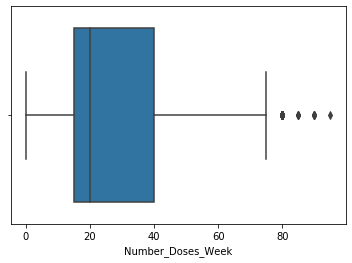

In [56]:
sns.boxplot(agri_train_int['Number_Doses_Week'])

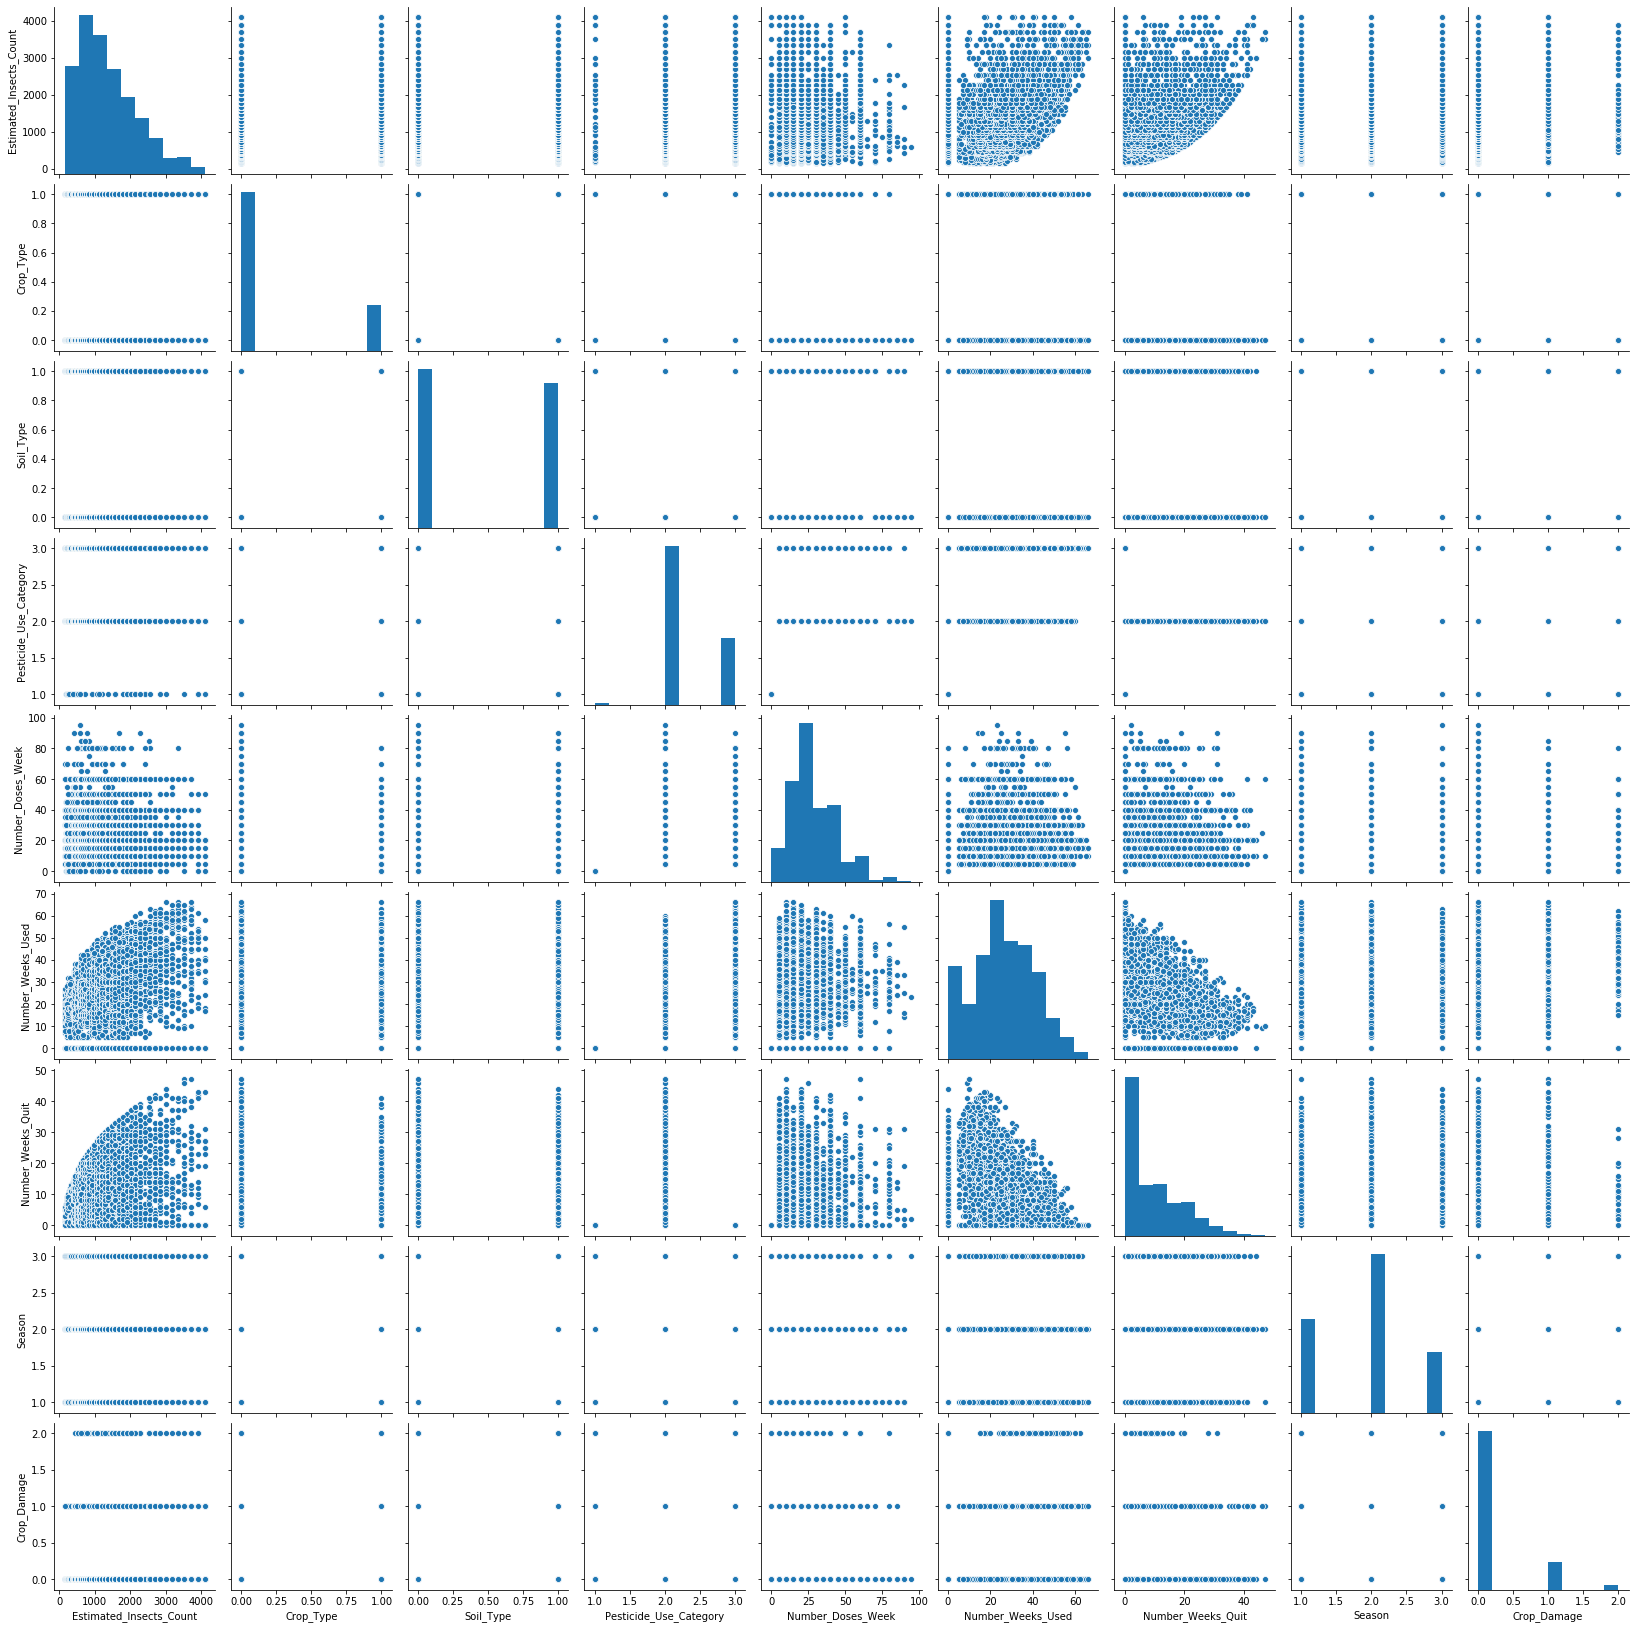

In [57]:
sns.pairplot(agri_train)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  5798 non-null   int64  
 1   Crop_Type                5798 non-null   int64  
 2   Soil_Type                5798 non-null   int64  
 3   Pesticide_Use_Category   5798 non-null   int64  
 4   Number_Doses_Week        5798 non-null   int64  
 5   Number_Weeks_Used        5798 non-null   float64
 6   Number_Weeks_Quit        5798 non-null   int64  
 7   Season                   5798 non-null   int64  
 8   Crop_Damage              5798 non-null   float64
 9   source                   5798 non-null   object 
 10  Item_Outlet_Sales        5798 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 543.6+ KB


In [59]:
df_object=df.select_dtypes(include=[np.object])
df_object

,source
0,train
1,train
2,train
3,train
4,train
...,...
1194,test
1195,test
1196,test
1197,test


In [60]:
for i in df_object:
    print(i)
    print(df_object[i].value_counts(),'\n')

source
train    4599
test     1199
Name: source, dtype: int64 



In [61]:
Train=df.loc[df['source']=='train']
Train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source,Item_Outlet_Sales
0,188,1,0,1,0,0.0,0,1,0.0,train,0.0
1,209,1,0,1,0,0.0,0,2,1.0,train,0.0
2,257,1,0,1,0,0.0,0,2,1.0,train,0.0
3,257,1,1,1,0,0.0,0,2,1.0,train,0.0
4,342,1,0,1,0,0.0,0,2,1.0,train,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,0.0,1,1,1.0,train,0.0
4595,2139,0,1,2,30,47.0,2,1,1.0,train,0.0
4596,2267,0,1,2,10,7.0,27,2,0.0,train,0.0
4597,2267,0,1,2,10,20.0,24,2,0.0,train,0.0


In [62]:
x=Train.drop(['Crop_Damage'],axis=1)
x=Train.drop(['source'],axis=1)
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Item_Outlet_Sales
0,188,1,0,1,0,0.0,0,1,0.0,0.0
1,209,1,0,1,0,0.0,0,2,1.0,0.0
2,257,1,0,1,0,0.0,0,2,1.0,0.0
3,257,1,1,1,0,0.0,0,2,1.0,0.0
4,342,1,0,1,0,0.0,0,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,0.0,1,1,1.0,0.0
4595,2139,0,1,2,30,47.0,2,1,1.0,0.0
4596,2267,0,1,2,10,7.0,27,2,0.0,0.0
4597,2267,0,1,2,10,20.0,24,2,0.0,0.0


In [63]:
Test=df.loc[df['source']=='test']
Test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source,Item_Outlet_Sales
0,188,1,1,1,0,0.0,0,2,0.0,test,0.0
1,410,1,1,1,0,0.0,0,2,0.0,test,0.0
2,626,1,0,1,0,0.0,0,2,0.0,test,0.0
3,731,1,0,1,0,0.0,0,2,0.0,test,0.0
4,789,0,0,1,0,0.0,0,1,0.0,test,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3,0.0,test,0.0
1195,1132,0,1,2,40,25.0,3,1,0.0,test,0.0
1196,1132,0,1,2,20,13.0,23,1,0.0,test,0.0
1197,1212,0,1,2,10,35.0,5,1,0.0,test,0.0


In [64]:
Test.drop(['source'],axis=1,inplace=True)
Test.drop(['Crop_Damage'],axis=1,inplace=True)

In [65]:
y=Train['Crop_Damage']

In [66]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4594    1.0
4595    1.0
4596    0.0
4597    0.0
4598    0.0
Name: Crop_Damage, Length: 4599, dtype: float64

In [67]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=63)
print(x_train.shape,x_test.shape)

(3679, 10) (920, 10)


In [69]:
print(y_train.shape,y_test.shape)

(3679,) (920,)


In [70]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))


In [71]:
x

array([[-1.44286807,  1.85681868, -0.95429408, ..., -1.28702725,
        -0.42765624,  0.        ],
       [-1.41708065,  1.85681868, -0.95429408, ...,  0.15207762,
         1.77233374,  0.        ],
       [-1.35813798,  1.85681868, -0.95429408, ...,  0.15207762,
         1.77233374,  0.        ],
       ...,
       [ 1.11008649, -0.53855555,  1.04789501, ...,  0.15207762,
        -0.42765624,  0.        ],
       [ 1.11008649, -0.53855555,  1.04789501, ...,  0.15207762,
        -0.42765624,  0.        ],
       [ 1.11008649, -0.53855555,  1.04789501, ...,  0.15207762,
        -0.42765624,  0.        ]])

In [72]:
lr = LogisticRegression(solver="lbfgs")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [73]:
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [74]:
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [75]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [76]:
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [77]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


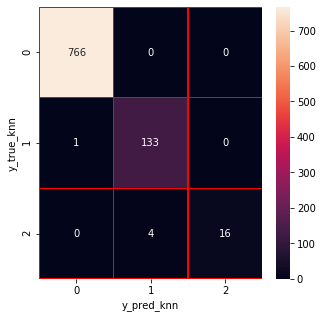

In [78]:
y_pred_knn = knn.predict(x_test)
y_true_knn = y_test
cm = confusion_matrix(y_true_knn, y_pred_knn)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_knn")
plt.ylabel("y_true_knn")
plt.show()

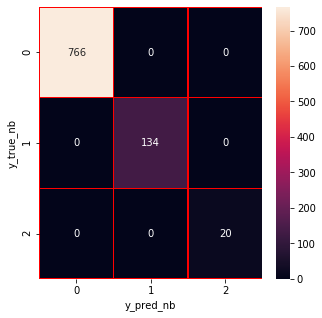

In [79]:
y_pred_nb = nb.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

In [80]:
from sklearn.externals import joblib

#save the model as pickle in a file
joblib.dump(KNN,'Model Agriculture.pkl')

['Model Agriculture.pkl']